# **Twitter Sentiment Analysis**
---
Pranav Sarode and Brian Arnold


# **Table of Contents**

Data Pre-Processing

Machine Learning Pipeline 

Machine Learning Models and Performance
	
	* Feature Extraction 

	* Naive Bayes Classifier 

	* Logistic Regression 

	* Ensemble/AdaBoost Classifier 

	* Decision Tree Classifier 

	* Random Forest Classifier 



In [ ]:
# Import data structures
import pandas as pd
import numpy as np

# Import NLP/Text Pre-Processing Libraries
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Import scikit learn ML Libraries
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Import plotting tools
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Pre-Processing**

## Pre-Processing Techniques Used

1. **Change text to lowercase**: All tweet text was made to be lower case text. This 
allows for models to learn from recurring words regardless of their varying case as they appear in different tweets. The model could potentially be trained to weight text in uppercase more heavily, but changing the tweet text to lowercase simplifies the model and facilitates term frequency analysis.

2. **Remove urls and web addresses**: Upon inspection of the dataset, it was discovered that several of the tweet texts in the dataset included urls. Regular expressions were used to remove these from the tweets because they do not aid in determining sentiment. Mostly, these are entirely neutral sections of text.

3. **Remove user account references and hashtags**: Upon inspection of the dataset, it was discovered that several of the tweet texts in the dataset included user account mentions designated by an @ symbol and hashtags designated by a # symbol. Regular expressions were used to remove these symbols from the tweets because they do not aid in determining sentiment.

4. **Remove punctuations**: Most text in any situation is littered with punctuation. While some punctuation marks could be useful to sentiment analysis, ultimately, the model is simplified without it and term frequency analysis is facilitated.


## Other Pre-Processing Techniques Tested

1. **Remove stop words**: In initial classifier iterations, the common ‘english’ stop word list was used to create a set. Then, words contained in tweet text which also belonged to the set of stop words were removed from all the tweet text in the dataset. The goal was to eliminate common words like “a”, “and”, “the” to amplify the analysis of words and phrases more important to sentiment analysis. Creating the set out of the list of stop words decreased the computation time of this operation. However, in the evaluation of our base model it was discovered that keeping stop words and considering bigram and trigrams actually improved model performance over unigram analysis without stopwords. Evidently, some words included in the list provided useful context when considered with other words. A more curated stop word list may have been useful.

2. **Segment improperly joined words**: An attempt was made during pre-processing iterations to segment words that were improperly joined using a python package. This would allow words like “thecowjumpedoverthemoon” to be separated into several words: “the cow jumped over the moon”. This would have been useful in extracting information from hashtags which frequently join multiple, separate words. However, the compute time to apply this operation to the entire dataset was too long and therefore prohibitive. This method was not scalable.

3. **Perform spell correction on tweet text**: An attempt was made during pre-processing iterations to modify incorrectly spelled words with a python package. The model would likely have trouble connecting “aamazing”, “amazzing”, and “amazing”. Certainly, all three spellings would often indicate a positive sentiment. However, this method was not scalable. The compute time to apply this operation to the data set was too lengthy.

4. **Lemmatize tweet text**: Lemmatizing aims to group together different forms of the same word for the model to better capture how that word affects the sentiment throughout the data. For example, “running” may become “run” or “crying” may become “cry”. After deploying lemmatization, however, model performance decreased on all models. Perhaps, inflection in words provides some context to sentiment.


In [ ]:
pip install -U symspellpy


In [ ]:
from symspellpy.symspellpy import SymSpell

In [ ]:
# Create a set of stop words for O(1) access time in stop word removal
# stop_words = set(stopwords.words('english'))

# Try a different/smarter stop words list
#stop_words = set(stopwords.words('computer'))

In [ ]:
# Takes in a filename and list of column names and generates a corresponding
# Pandas dataframe
def load_dataset(filename, cols):
    dataset = pd.read_csv(filename, encoding='latin-1')
    dataset.columns = cols
    return dataset

In [ ]:
# Takes in a Pandas dataframe and removes unwanted columns specified in the 
#cols list parameter passed in
def remove_unwanted_cols(dataset, cols):
    for col in cols:
        del dataset[col]
    return dataset

In [ ]:
# Takes in tweet text and perform a series of natural language pre-processing
# operations on the tweet to prepare for training state of pipeline
def preprocess_tweet_text(tweet):
    # Turn all characters in tweet text to lowercase
    tweet = tweet.lower()

    # Remove unwanted urls and web addresses from tweet text
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)

    # Remove user @ references and '#' from tweet text
    tweet = re.sub(r'\@\w+|\#','', tweet)

    # Remove all numbers from tweet text
    tweet = re.sub(r'[0-9]','', tweet)

    # Remove punctuations from tweet text
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    # Try segmenting/breaking up words combined into one word
    # e.g. "thecowjumpedoverthemoon" -> "the" "cow" "jumped" "over" "the" "moon"
    # result = sym_spell.word_segmentation(tweet)
    # tweet = result.corrected_string

    # Try tokenizing tweet text into individual words and removing stop words
    # tweet_tokens = word_tokenize(tweet)
    # filtered_words = [w for w in tweet_tokens if not w in stop_words]  
    # return " ".join(filtered_words)
    
    # Try spell correcting misspelled words
    # spell = SpellChecker()
    # spellchecked_words = []
    # for word in tweet.split():
        # Get the one `most likely` answer
        # spellchecked_words.append(spell.correction(word))
        # tweet = ' '.join(spellchecked_words)
    
    return tweet

In [ ]:
# Performs feature extraction by creating a term frequency - inverse document
# frequency (TF-IDF) feature vectorizer that is fit to the Pandas dataframe
# passed in
def get_feature_vector(train_fit):
  
    # Try unigram vectorization
    # vector = TfidfVectorizer(sublinear_tf=True)

    # Try unigram/bigram vectorization
    # vector = TfidfVectorizer(ngram_range=(1,2), sublinear_tf=True)

    # Initialize unigram/bigram/trigram vectorizer and fit to data
    vector = TfidfVectorizer(ngram_range=(1,3), sublinear_tf=True)
    vector.fit_transform(train_fit)
    return vector

In [ ]:
# Convert integer representation of sentiment to string representation of
# sentiment
def int_to_string(sentiment):
    if sentiment == 0:
        return "Negative"
    elif sentiment == 2:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
dataset = load_dataset("/content/drive/MyDrive/data.csv", ['target', 't_id', 'created_at', 'query', 'user', 'text'])
# Remove unwanted columns from dataset
dataset = remove_unwanted_cols(dataset, ['t_id','created_at', 'query', 'user'])
#Preprocess data
dataset.text = dataset['text'].apply(preprocess_tweet_text)

In [ ]:
dataset

,target,text
0,0,upset that cant update his facebook texting ...
1,0,dived many times for the ball managed save ...
2,0,its not behaving all mad why here because ...
3,0,not the whole crew
4,0,need hug
...,...,...
1310101,1,just woke having school the best feeling ever
1310102,1,thewdbcom very cool hear old walt interviews...
1310103,1,are you ready for your mojo makeover ask for ...
1310104,1,happy birthday boo alll time tupac amaru s...


In [ ]:
dataset.to_csv('/content/drive/MyDrive/featured_data_new.csv', header=True)

# **Our Machine Learning Pipeline**
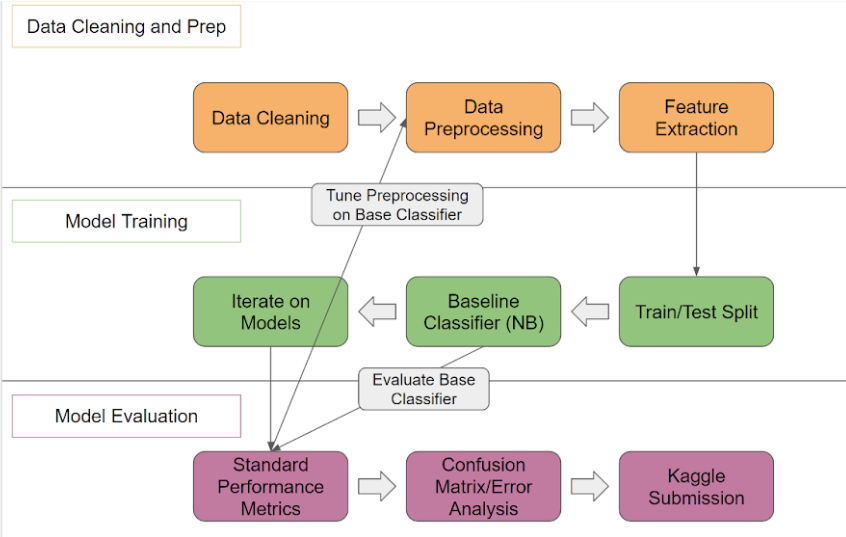

# **Machine Learning Models and Performance**

## Feature Extraction

Unigram-Bigram-Trigram Vectorizer:

---



In initial iterations of the baseline classifier, the Naive Bayes Classifier, feature extraction was done with unigrams. This means that individual words in the tweet text were considered and the model was trained with patterns. In this case, removal of stop words improved model performance. However, keeping stop words and using bigram feature vectorization resulted in a 3-5% improvement in F-score across multiple models. When trigram feature vectorization was used, an additional marginal improvement over bigram feature vectorization was observed.


TFIDF and Count Vectorizer:

---



Term Frequency - Inverse Document Frequency (TFIDF) Vectorization created more useful feature extraction than Count Vectorization according to a comparison of F1-score results across multiple models. Term frequency indicates that the model associates higher relative weights to grams that appear frequently in tweets. Inverse document frequency indicates that the model associates lower relative weights to grams that appear frequently across a collection of analyzed texts and documents. The resulting combination in feature extraction is that the model gives higher weights to words which appear disproportionately higher in tweets than in other documents and text. Examples may include “LOL” and “retweet”. Additionally, the model does not heavily consider words that appear often, if they appear proportionately. For example, the model would not likely heavily consider words like “a” or “the” when determining sentiment.


In [ ]:
# Same tf vector will be used for Testing sentiments on unseen trending data
tf_vector = get_feature_vector(np.array(dataset.iloc[:, 1]).ravel())
X = tf_vector.transform(np.array(dataset.iloc[:, 1]).ravel())
y = np.array(dataset.iloc[:, 0]).ravel()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

## Naive-Bayes Classifier

*Performance*:


              precision    recall  f1-score   support

    Positive       0.79      0.82      0.81    131560
    Negative       0.81      0.78      0.80    130462

    accuracy                           0.80    262022
   macro avg       0.80      0.80      0.80    262022
weighted avg       0.80      0.80      0.80    262022



Text(0.5, 15.0, 'Predicted')

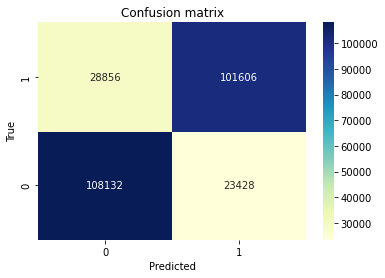

In [ ]:
# Training Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_predict_nb = NB_model.predict(X_test)

print(metrics.classification_report(y_test, y_predict_nb,target_names=['Positive', 'Negative']))

cnf_matrix = metrics.confusion_matrix(y_test, y_predict_nb)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Heatmap effect is added to confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='g')
ax.set_ylim([0,2])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Discussion on Naive-Bayes:
Pros:
1. Easy Implementation
Probably one of the simplest, easiest to implement and most straight-forward machine learning algorithm.

2. Fast and Simple
Naive Bayes is not only simple but it's fast and simple which makes it a perfect candidate in certain situations. When you're looking for the least hyper parameters but still very acceptable results Naive Bates algorithm may be the way to go.

3. Scaling Advantages
Naive Bayes scales linearly which makes it a great candidate for large setups.

4. Naive Bayes uses very little resources (RAM & CPU) compared to other algorithms. Without kernels, regularization etc. Naive Bayes is such a lightweight implementation.

Cons:
1. Biased Nature
Since Naive Bayes is such a quick and dirty method and it avoids noise so well this also might mean shortcomings. Naive Bayes processes all features as independent and this means some features might be processed with a much higher bias than we'd wish.
2. Limited Application Case
As another side effect of all the other cons Naive Bayes comes with, the application case can be quite limited depending on your domain. If we are after a simple classification solutions such as: (spam | not spam; soccer | hockey | golf) great. But if we have tons of complex features or a problem that requires every predictive juice possible because the consequences of small inaccuracy can mean big trouble (think autonomous driving) Naive Bayes might be too naive for us.

## Logistic Regression

*Performance:*


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

    Positive       0.82      0.79      0.81    131560
    Negative       0.80      0.82      0.81    130462

    accuracy                           0.81    262022
   macro avg       0.81      0.81      0.81    262022
weighted avg       0.81      0.81      0.81    262022



Text(0.5, 15.0, 'Predicted')

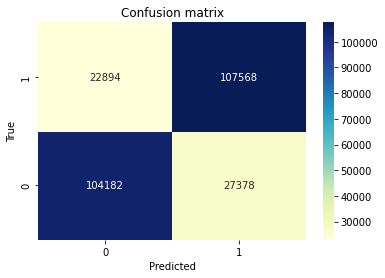

In [ ]:
# Training Logistics Regression model
LR_model = LogisticRegression(solver='lbfgs', C=2)
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)

print(metrics.classification_report(y_test, y_predict_lr,target_names=['Positive', 'Negative']))

cnf_matrix = metrics.confusion_matrix(y_test, y_predict_lr)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Heatmap effect is added to confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='g')
ax.set_ylim([0,2])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Discussion on Logistic Regression:
Pros:
1. One of the great advantages of Logistic Regression is that when you have a complicated linear problem and not a whole lot of data it's still able to produce pretty useful predictions. This is a pro that comes with Logistic Regression's mathematical foundations and won't be possible with most other Machine Learning models. But in this case, we had a lot of training data. LR performed the best among our models and it was expected as well.

2. Logistic Regression is not a resource hungry model (unlike many others, think NNs, SVM, kNN) and this makes it suitable for some simple applications. Though it was more computationally expensive model than Naive-Bayes that we saw previously.

3. Since Logistic Regression comes with a fast, resource friendly algorithm it scales pretty nicely. While many algorithms struggles with large datasets (such as SVMs, kNNs, sometimes Tree based models, etc.) LR will give us the result faster than them. This was observed by us as Tree Models took a lot of time to train.

4. Logistic Regression won't overfit easily as it's a linear model. Especially with the C regularization parameter in scikitlearn you can easily take control of any overfitting anxiety you might have.

Cons:
1. Logistic Regression is strictly a classification method and it has lots of competition. (SVMs, Naive Bayes, Random Forests, kNN etc.)

2. Logistic Regression is not immune to missing data unlike some other machine learning models such as decision trees and random forests which are based on trees.

3. Logistic Regression is not immune to missing data unlike some other machine learning models such as decision trees and random forests which are based on trees. This usually means extra work on data regarding processing missing values.

# Decision Tree:
*Performance*

In [ ]:
from sklearn.tree import DecisionTreeClassifier

hello
classifier
trained
predicted
              precision    recall  f1-score   support

    Positive       0.66      0.01      0.02    131560
    Negative       0.50      0.99      0.66    130462

    accuracy                           0.50    262022
   macro avg       0.58      0.50      0.34    262022
weighted avg       0.58      0.50      0.34    262022



Text(0.5, 15.0, 'Predicted')

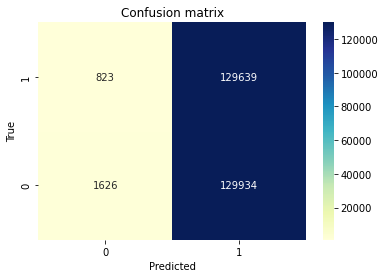

In [ ]:
# Training Decision Tree model
print("hello")
clf = DecisionTreeClassifier(max_depth=8, max_features="auto")
print("classifier")
clf.fit(X_train, y_train)
print("trained")
y_predict_dt = clf.predict(X_test)
print("predicted")

print(metrics.classification_report(y_test, y_predict_dt,target_names=['Positive', 'Negative']))

cnf_matrix = metrics.confusion_matrix(y_test, y_predict_dt)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Heatmap effect is added to confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='g')
ax.set_ylim([0,2])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

#Discussion on DT:
max-depth=8 and max_features=”auto” in an attempt to make tree shallower and feature number smaller for quicker training resulted in bad results above
The default parameters caused training compute time to be completely unreasonable

Pros:
1. Since it's constructed of one single tree in such a straightforward way, you can directly observe Decision Tree in the working or easily interpret its results.

Cons:
1. If dataset is not balanced this can cause a bias. Balancing dataset in advance fixes this problem.

2. Here we got pretty bad results after training, so we tried a couple of more models.

In [ ]:
# Training Random Forest Model
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
y_predict_rf = clf.predict(X_test)

print(metrics.classification_report(y_test, y_predict_rf,target_names=['Positive', 'Negative']))

cnf_matrix = metrics.confusion_matrix(y_test, y_predict_rf)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Heatmap effect is added to confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='g')
ax.set_ylim([0,2])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
print("hello")
clf = AdaBoostClassifier(base_estimator=LR_model)
print("classifier")
clf.fit(X_train, y_train)
print("trained")
y_predict_abc = clf.predict(X_test)
print("predicted")

hello
classifier


In [ ]:
print(metrics.classification_report(y_test, y_predict_abc,target_names=['Positive', 'Negative']))

cnf_matrix = metrics.confusion_matrix(y_test, y_predict_abc)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Heatmap effect is added to confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='g')
ax.set_ylim([0,2])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
#Cleaned meaning - for ease, we had removed some unneccasry colums from the eval dataset. If trying on the normal evaluation data, you can use the code below (commented):
'''
dataset = load_dataset("twitter_sentiments_evaluation.csv", ['tweet_index', 'created_at', 'query', 'user', 'tweet'])
# Remove unwanted columns from dataset
test_ds = remove_unwanted_cols(dataset, ['created_at', 'query', 'user'])
#test_ds = remove_unwanted_cols(test_ds, ["time_stamp", "user"])
'''

test_file_name = "/content/drive/MyDrive/evaluation_cleaned.csv" 
test_ds = load_dataset(test_file_name, ["tweet_index", "tweet"])
#test_ds = remove_unwanted_cols(test_ds, ["time_stamp", "user"])
# Creating text feature
test_ds.text = test_ds["tweet"].apply(preprocess_tweet_text)
test_feature = tf_vector.transform(np.array(test_ds.iloc[:, 1]).ravel())

# Using Logistic Regression model for prediction
test_prediction_lr = LR_model.predict(test_feature)

# Averaging out the hashtags result
test_result_ds = pd.DataFrame({'tweet_index': test_ds.tweet_index, 'target':test_prediction_lr})
#test_result = test_result_ds.groupby(['hashtag']).max().reset_index()
test_result_ds.columns = ['tweet_index', 'target']
test_result_ds.predictions = test_result_ds['target']
test_result_ds = test_result_ds.set_index('tweet_index')

print(test_result_ds)
test_result_ds.to_csv('test_predictions_newnewnewnewnew.csv', header=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


             target
tweet_index        
1467810369        0
1467811184        0
1986106482        0
2324660036        0
1467811594        1
...             ...
1964021414        1
2014990392        0
2014990424        1
2014990586        1
2190808431        1

[289834 rows x 1 columns]


#Kaggle Submission:

Our group SPD! performed well in the Kaggle Submission. We got the score of 0.81395 on kaggle public dataset. It was a great learning experience to figure out the parameters we needed to tune to get this accuracy. In the above section we evaluated our trained model (we chose LR here as it was the best performing model for us) on the evaluation data and exported a .csv file with the required headers for submission.
At the time of submission we were ranked 13th overall on the public dataset. Our accuracy was better than a lot of models.